In [ ]:
  !pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio.PDB import *
import nglview as nv

In [ ]:
!wget http://www.rcsb.org/pdb/files/6M0J.pdb.gz

URL transformed to HTTPS due to an HSTS policy
--2022-11-22 09:41:55--  https://www.rcsb.org/pdb/files/6M0J.pdb.gz
Resolving www.rcsb.org (www.rcsb.org)... 132.249.210.225
Connecting to www.rcsb.org (www.rcsb.org)|132.249.210.225|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.rcsb.org/download/6M0J.pdb.gz [following]
--2022-11-22 09:41:55--  https://files.rcsb.org/download/6M0J.pdb.gz
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.222
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142932 (140K) [application/octet-stream]
Saving to: ‘6M0J.pdb.gz’

6M0J.pdb.gz         100%[===================>] 139.58K  --.-KB/s    in 0.03s   

2022-11-22 09:41:56 (4.82 MB/s) - ‘6M0J.pdb.gz’ saved [142932/142932]



In [ ]:
!gunzip 6M0J.pdb.gz

gzip: 6M0J.pdb already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
!wget http://www.rcsb.org/pdb/files/6M0J.cif.gz
!gunzip 6M0J.cif.gz

URL transformed to HTTPS due to an HSTS policy
--2022-11-22 09:47:33--  https://www.rcsb.org/pdb/files/6M0J.cif.gz
Resolving www.rcsb.org (www.rcsb.org)... 132.249.210.225
Connecting to www.rcsb.org (www.rcsb.org)|132.249.210.225|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.rcsb.org/download/6M0J.cif.gz [following]
--2022-11-22 09:47:33--  https://files.rcsb.org/download/6M0J.cif.gz
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.222
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179630 (175K) [application/octet-stream]
Saving to: ‘6M0J.cif.gz’

6M0J.cif.gz         100%[===================>] 175.42K  --.-KB/s    in 0.03s   

2022-11-22 09:47:33 (5.74 MB/s) - ‘6M0J.cif.gz’ saved [179630/179630]

gzip: 6M0J.cif already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
#And we set up a parser for our PDB
parser = PDBParser()
io=PDBIO()
structure = parser.get_structure('X', '6M0J.pdb')

"""
#This will separate each chain into its own PDB file
for chain in structure.get_chains():
    io.set_structure(chain)
    io.save("6M0J_" + chain.get_id() + ".pdb")
"""

'\n#This will separate each chain into its own PDB file\nfor chain in structure.get_chains():\n    io.set_structure(chain)\n    io.save("6M0J_" + chain.get_id() + ".pdb")\n'

In [ ]:
# Number of models 
len(structure)
list(structure.get_models())

[<Model id=0>]

In [ ]:
for chain in structure[0]:
    print(chain.id, len(chain))

A 674
E 204



## Preparation: quality checking


In [ ]:
!pip install "biobb_structure_checking>=3.10.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# needed imports
import biobb_structure_checking
import biobb_structure_checking.constants as cts
from biobb_structure_checking.structure_checking import StructureChecking
base_dir_path=biobb_structure_checking.__path__[0]
args = cts.set_defaults(base_dir_path,{'notebook':True})

General help

In [ ]:
with open(args['commands_help_path']) as help_file:
    print(help_file.read())
#TODO: prepare a specific help method
# print_help(command)


BioBB's check_structure.py performs MDWeb structure checking set as a command line
utility.

commands:     Help on available commands
command_list: Run all tests from conf file or command line list
checkall:     Perform all checks without fixes
load:         Stores structure on local cache and provides basic statistics

1. System Configuration
sequences 
    Print canonical and structure sequences in FASTA format
models [--select model_num] [--superimpose] [--save_split]
    Detect/Select Models
    --superimpose Superimposes currently selected models
    --save_split Split models as separated output files. 
chains [--select chain_ids | molecule_type]
    Detect/Select Chains
inscodes 
    Detects residues with insertion codes. No fix provided (yet)
altloc [--select occupancy| alt_id | list of res_id:alt_id]
    Detect/Select Alternative Locations
metals [--remove All | None | Met_ids_list | Residue_list]
    Detect/Remove Metals
ligands [--remove All | None | Res_type_list | Residue_

In [ ]:
base_path = './'
args['input_structure_path'] = base_path + '6M0J.cif'
args['output_structure_path'] = base_path + '6m0j_fixed.pdb'
args['output_format'] = "pdb"
args['keep_canonical'] = False
args['output_structure_path_charges'] = base_path + '6m0j_fixed.pdbqt'
args['debug'] = False
args['verbose'] = False

In [ ]:
st_c = StructureChecking(base_dir_path, args)

Structure ./6M0J.cif loaded
 PDB id: 6M0J
 Title: Crystal structure of SARS-CoV-2 spike receptor-binding domain bound with ACE2
 Experimental method: X-RAY DIFFRACTION
 Keywords: VIRAL PROTEIN/HYDROLASE
 Resolution (A): 2.4500

 Num. models: 1
 Num. chains: 2 (A: Protein, E: Protein)
 Num. residues:  878
 Num. residues with ins. codes:  0
 Num. residues with H atoms: 0
 Num. HETATM residues:  87
 Num. ligands or modified residues:  7
 Num. water mol.:  80
 Num. atoms:  6558
Metal/Ion residues found
 ZN A901
 CL A902
Small mol ligands found
NAG A903
NAG A904
NAG A905
NAG A906
NAG E601



Here we can check how many models do we have:

In [ ]:
st_c.models()

Running models.
1 Model(s) detected
Single model found


There are two chains in our model:

In [ ]:
st_c.chains()

Running chains.
2 Chain(s) detected
 A: Protein
 E: Protein


Then we can check if there are any atoms with alternative locations:

In [ ]:
st_c.altloc()

Running altloc.
Detected 2 residues with alternative location labels
HIS A228
  CA   A (0.50) B (0.50)
  CB   A (0.50) B (0.50)
  CG   A (0.50) B (0.50)
  ND1  A (0.50) B (0.50)
  CD2  A (0.50) B (0.50)
  CE1  A (0.50) B (0.50)
  NE2  A (0.50) B (0.50)
GLN E493
  CA   A (0.50) B (0.50)
  CB   A (0.50) B (0.50)
  CG   A (0.50) B (0.50)
  CD   A (0.50) B (0.50)
  OE1  A (0.50) B (0.50)
  NE2  A (0.50) B (0.50)


There are two of them: His A228 and Gln E493 and thus for each we have to fix one state.

In [ ]:
st_c.altloc('occupancy')

Running altloc. Options: occupancy
Detected 2 residues with alternative location labels
HIS A228
  CA   A (0.50) B (0.50)
  CB   A (0.50) B (0.50)
  CG   A (0.50) B (0.50)
  ND1  A (0.50) B (0.50)
  CD2  A (0.50) B (0.50)
  CE1  A (0.50) B (0.50)
  NE2  A (0.50) B (0.50)
GLN E493
  CA   A (0.50) B (0.50)
  CB   A (0.50) B (0.50)
  CG   A (0.50) B (0.50)
  CD   A (0.50) B (0.50)
  OE1  A (0.50) B (0.50)
  NE2  A (0.50) B (0.50)
Selecting location occupancy


In [ ]:
st_c.altloc()

Running altloc.
No residues with alternative location labels detected


We can check if there are any metal ions in our structure:
there is only one zinc ion in the structure

In [ ]:
st_c.metals()

Running metals.
1 Metal ions found
  ZN A901.ZN 


Apart from metal ion there are som ligang in our structure that we will remove:

In [ ]:
st_c.ligands()

Running ligands.
7 Ligands detected
  ZN A901
  CL A902
 NAG A903
 NAG A904
 NAG A905
 NAG A906
 NAG E601


In [ ]:
st_c.ligands('All')

Running ligands. Options: All
7 Ligands detected
  ZN A901
  CL A902
 NAG A903
 NAG A904
 NAG A905
 NAG A906
 NAG E601
Ligands removed All (7)


In [ ]:
st_c.ligands()

Running ligands.
No ligands found


Then we can check the presense of the hydrogen atoms:

In [ ]:
st_c.rem_hydrogen()

Running rem_hydrogen.
No residues with Hydrogen atoms found


We are also removing the water molecules (80 were found):

In [ ]:
st_c.water()

Running water.
80 Water molecules detected


In [ ]:
st_c.water("yes")

Running water. Options: yes
80 Water molecules detected
80 Water molecules removed


Now we can check for amides:

In [ ]:
st_c.amide()

Running amide.
7 unusual contact(s) involving amide atoms found
 LYS A31.NZ   GLN E493.NE2    2.926 A
 GLN A42.NE2  GLN E498.NE2    2.927 A
 ASN A103.OD1 ASN A194.OD1    2.807 A
 ASN A134.OD1 GLU A140.OE2    2.785 A
 ASN A134.ND2 ASN A137.N      3.082 A
 GLU A150.O   ASN A154.OD1    2.895 A
 ARG E357.NH1 ASN E394.ND2    2.963 A


In [ ]:
st_c.amide('all')

Running amide. Options: all
7 unusual contact(s) involving amide atoms found
 LYS A31.NZ   GLN E493.NE2    2.926 A
 GLN A42.NE2  GLN E498.NE2    2.927 A
 ASN A103.OD1 ASN A194.OD1    2.807 A
 ASN A134.OD1 GLU A140.OE2    2.785 A
 ASN A134.ND2 ASN A137.N      3.082 A
 GLU A150.O   ASN A154.OD1    2.895 A
 ARG E357.NH1 ASN E394.ND2    2.963 A
Amide residues fixed all (8)
Rechecking
4 unusual contact(s) involving amide atoms found
 GLN A42.OE1  GLN E498.OE1    2.927 A
 ASN A103.ND2 ASN A194.ND2    2.807 A
 ARG E357.NH1 ASN E394.ND2    3.022 A
 ASN E394.OD1 GLU E516.OE2    2.850 A


In [ ]:
st_c.amide()

Running amide.
4 unusual contact(s) involving amide atoms found
 GLN A42.OE1  GLN E498.OE1    2.927 A
 ASN A103.ND2 ASN A194.ND2    2.807 A
 ARG E357.NH1 ASN E394.ND2    3.022 A
 ASN E394.OD1 GLU E516.OE2    2.850 A


As we can see, A42 and A103 were present in both checks as well as E394 which is involved in two interactions (with E516 and with E357). 

In [ ]:
st_c.amide('A42,A103')

Running amide. Options: A42,A103
4 unusual contact(s) involving amide atoms found
 GLN A42.OE1  GLN E498.OE1    2.927 A
 ASN A103.ND2 ASN A194.ND2    2.807 A
 ARG E357.NH1 ASN E394.ND2    3.022 A
 ASN E394.OD1 GLU E516.OE2    2.850 A
Amide residues fixed A42,A103 (2)
Rechecking
2 unusual contact(s) involving amide atoms found
 ARG E357.NH1 ASN E394.ND2    3.022 A
 ASN E394.OD1 GLU E516.OE2    2.850 A


In [ ]:
st_c.amide('E394')

Running amide. Options: E394
2 unusual contact(s) involving amide atoms found
 ARG E357.NH1 ASN E394.ND2    3.022 A
 ASN E394.OD1 GLU E516.OE2    2.850 A
Amide residues fixed E394 (1)
Rechecking
1 unusual contact(s) involving amide atoms found
 ARG E357.NH1 ASN E394.ND2    2.963 A


Now we can check the chirality:

In [ ]:
st_c.chiral()

Running chiral.
No residues with incorrect side-chain chirality found


Here, we can check for backbone breaks or residues without backbone atoms.

In [ ]:
st_c.backbone()

Running backbone.
2 Residues with missing backbone atoms found
 ASP A615   OXT
 GLY E526   OXT
No backbone breaks
No unexpected backbone links


In [ ]:
st_c.backbone('--fix_atoms All --fix_chain none --add_caps none')

Running backbone. Options: --fix_atoms All --fix_chain none --add_caps none
2 Residues with missing backbone atoms found
 ASP A615   OXT
 GLY E526   OXT
No backbone breaks
No unexpected backbone links
Capping terminal ends
True terminal residues:  A19,A615,E333,E526
No caps added
Fixing missing backbone atoms
Adding missing backbone atoms
ASP A615
  Adding new atom OXT
GLY E526
  Adding new atom OXT
Fixed 2 backbone atom(s)
Checking for steric clashes
No severe clashes detected
No apolar clashes detected
No polar_acceptor clashes detected
No polar_donor clashes detected
No positive clashes detected
No negative clashes detected


As the result we found two residues with missing backbone atoms and we restored the corresponding backbone atoms.

Now we check for missing sidechains:

In [ ]:
st_c.fixside()

Running fixside.
No residues with missing or unknown side chain atoms found


Now we can check for disulfide bonds based on distances:

In [ ]:
st_c.getss()

Running getss.
7 Possible SS Bonds detected
 CYS A133.SG  CYS A141.SG     4.237
 CYS A344.SG  CYS A361.SG     4.159
 CYS A530.SG  CYS A542.SG     4.095
 CYS E336.SG  CYS E361.SG     4.152
 CYS E379.SG  CYS E432.SG     4.177
 CYS E391.SG  CYS E525.SG     4.191
 CYS E480.SG  CYS E488.SG     4.269


In [ ]:
st_c.getss('all')

Running getss. Options: all
7 Possible SS Bonds detected
 CYS A133.SG  CYS A141.SG     4.237
 CYS A344.SG  CYS A361.SG     4.159
 CYS A530.SG  CYS A542.SG     4.095
 CYS E336.SG  CYS E361.SG     4.152
 CYS E379.SG  CYS E432.SG     4.177
 CYS E391.SG  CYS E525.SG     4.191
 CYS E480.SG  CYS E488.SG     4.269


We can now add H atoms making sure they are named in a consistent way:

In [ ]:
st_c.add_hydrogen()

Running add_hydrogen.
226 Residues requiring selection on adding H atoms
 CYS A261,A498
 ASP A30,A38,A67,A111,A136,A157,A198,A201,A206,A213,A216,A225,A269,A292,A295,A299,A303,A335,A350,A355,A367,A368,A382,A427,A431,A471,A494,A499,A509,A543,A597,A609,A615,E364,E389,E398,E405,E420,E427,E428,E442,E467
 GLU A22,A23,A35,A37,A56,A57,A75,A87,A110,A140,A145,A150,A160,A166,A171,A181,A182,A189,A197,A208,A224,A227,A231,A232,A238,A310,A312,A329,A375,A398,A402,A406,A430,A433,A435,A457,A467,A479,A483,A489,A495,A527,A536,A549,A564,A571,A589,E340,E406,E465,E471,E484,E516
 HIS A34,A195,A228,A239,A241,A265,A345,A373,A374,A378,A401,A417,A493,A505,A535,A540,E519
 LYS A26,A31,A68,A74,A94,A112,A114,A131,A174,A187,A234,A247,A288,A309,A313,A341,A353,A363,A416,A419,A441,A458,A465,A470,A475,A476,A481,A534,A541,A553,A562,A577,A596,A600,E356,E378,E386,E417,E424,E444,E458,E462
 ARG A115,A161,A169,A177,A192,A204,A219,A245,A273,A306,A357,A393,A460,A482,A514,A518,A559,A582,E346,E355,E357,E403,E408,E454,E457,E466,E509

In [ ]:
st_c.add_hydrogen('auto')

Running add_hydrogen. Options: auto
226 Residues requiring selection on adding H atoms
 CYS A261,A498
 ASP A30,A38,A67,A111,A136,A157,A198,A201,A206,A213,A216,A225,A269,A292,A295,A299,A303,A335,A350,A355,A367,A368,A382,A427,A431,A471,A494,A499,A509,A543,A597,A609,A615,E364,E389,E398,E405,E420,E427,E428,E442,E467
 GLU A22,A23,A35,A37,A56,A57,A75,A87,A110,A140,A145,A150,A160,A166,A171,A181,A182,A189,A197,A208,A224,A227,A231,A232,A238,A310,A312,A329,A375,A398,A402,A406,A430,A433,A435,A457,A467,A479,A483,A489,A495,A527,A536,A549,A564,A571,A589,E340,E406,E465,E471,E484,E516
 HIS A34,A195,A228,A239,A241,A265,A345,A373,A374,A378,A401,A417,A493,A505,A535,A540,E519
 LYS A26,A31,A68,A74,A94,A112,A114,A131,A174,A187,A234,A247,A288,A309,A313,A341,A353,A363,A416,A419,A441,A458,A465,A470,A475,A476,A481,A534,A541,A553,A562,A577,A596,A600,E356,E378,E386,E417,E424,E444,E458,E462
 ARG A115,A161,A169,A177,A192,A204,A219,A245,A273,A306,A357,A393,A460,A482,A514,A518,A559,A582,E346,E355,E357,E403,E408,E454,

Then in the end we can check if there are any clashes in the structure based on the distance criteria:
There some clashes found but none of them are severe.

In [ ]:
st_c.clashes()

Running clashes.
No severe clashes detected
4 Steric apolar clashes detected
 HIE A34.CD2  TYR E453.OH     2.860 A
 ASN A121.O   THR A125.CG2    2.890 A
 LEU A333.C   MET A360.O      2.881 A
 TYR E380.O   THR E430.C      2.758 A
5 Steric polar_acceptor clashes detected
 MET A152.O   GLY A268.O      3.063 A
 LEU A333.O   MET A360.O      2.881 A
 TYR E351.O   ASP E467.O      3.074 A
 TYR E380.O   THR E430.O      2.728 A
 GLY E485.O   CYX E488.O      3.046 A
1 Steric polar_donor clashes detected
 ARG E357.NH1 ASN E394.ND2    2.963 A
No positive clashes detected
No negative clashes detected


Checking everything last time:

In [ ]:
st_c.checkall()

Running models.
1 Model(s) detected
Single model found
Running chains.
2 Chain(s) detected
 A: Protein
 E: Protein
Running inscodes.
No residues with insertion codes found
Running altloc.
No residues with alternative location labels detected
Running rem_hydrogen.
791 Residues containing H atoms detected
Running add_hydrogen.
209 Residues requiring selection on adding H atoms
 CYS A261,A498
 ASP A30,A38,A67,A111,A136,A157,A198,A201,A206,A213,A216,A225,A269,A292,A295,A299,A303,A335,A350,A355,A367,A368,A382,A427,A431,A471,A494,A499,A509,A543,A597,A609,A615,E364,E389,E398,E405,E420,E427,E428,E442,E467
 GLU A22,A23,A35,A37,A56,A57,A75,A87,A110,A140,A145,A150,A160,A166,A171,A181,A182,A189,A197,A208,A224,A227,A231,A232,A238,A310,A312,A329,A375,A398,A402,A406,A430,A433,A435,A457,A467,A479,A483,A489,A495,A527,A536,A549,A564,A571,A589,E340,E406,E465,E471,E484,E516
 LYS A26,A31,A68,A74,A94,A112,A114,A131,A174,A187,A234,A247,A288,A309,A313,A341,A353,A363,A416,A419,A441,A458,A465,A470,A475,A476,A48

In [ ]:
st_c._save_structure(args['output_structure_path'])

'./6m0j_fixed.pdb'

## Step 1 - indentifying the interface residues on each chain

### Data libraries preparation

In [ ]:
class ResiduesDataLib(): # downloading the parameters library
    def __init__(self, fname):
        self.residue_data = {}
        try:
            fh = open(fname, "r")
        except OSError:
            print("#ERROR while loading library file (", fname, ")")
            sys.exit(2)
        for line in fh:
            if line[0] == '#':
                continue
            data = line.split()
            r = Residue(data)
            self.residue_data[r.id] = r
        self.nres = len(self.residue_data)

    def get_params(self, resid, atid):
        atom_id = resid + ':' + atid
        if atom_id in self.residue_data:
            return self.residue_data[atom_id]
        else:
            print("WARNING: atom not found in library (", atom_id, ')')
            return None

class Residue():
    def __init__(self,data):
        self.id     = data[0]+':'+data[1]
        self.at_type = data[2]
        self.charge  = float(data[3])
        
class AtomType():
    def __init__(self, data):
        self.id   = data[0]
        self.eps  = float(data[1])
        self.sig  = float(data[2])
        self.mass = float(data[3])
        self.fsrf = float(data[4])
        self.rvdw = self.sig * 0.5612
        
class VdwParamset(): #extracted from GELPI's github
    #parameters for the VdW
    def __init__ (self, file_name):
        self.at_types = {}
        try:
            fh = open(file_name, "r")
        except OSError:
            print ("#ERROR while loading parameter file (", file_name, ")")
            sys.exit(2)
        for line in fh:
            if line[0] == '#':
                continue
            data = line.split()
            self.at_types[data[0]] = AtomType(data)
        self.ntypes = len(self.at_types)
        fh.close()

In [ ]:
!git clone https://github.com/checheanya/ESCI_git

fatal: destination path 'ESCI_git' already exists and is not an empty directory.


In [ ]:
!cat './ESCI_git/raw_data/params_vdw'

#TYPE Eps Sigm Mass  fsrf
CR 0.09 3.40 12.00  0.111 Aromatic C
C  0.09 3.40 12.00  0.019 Alifatic C
NC 0.17 3.25 14.00 -0.126 Charged N
NR 0.17 3.25 14.00 -0.063 Arginine N
N  0.17 3.25 14.00 -0.124
P  0.20 3.74 31.00  0.000
S  0.25 3.56 32.00  0.026
HW 0.00 0.00  1.01  0.000 H Wat TIP3P
HO 0.00 0.00  1.01  0.000 H-O 
HN 0.02 1.07  1.01  0.000 H-N H-S
H  0.02 2.65  1.01  0.000 H-C
OW 0.15 3.15 16.00 -0.043 O Wat TIP3P
OH 0.21 2.96 16.00 -0.043 OH
OC 0.21 2.96 16.00 -0.069 COO-
O  0.21 2.96 16.00 -0.031 

In [ ]:
# loading residue library from data/aaLib.lib
residue_library = ResiduesDataLib('./ESCI_git/raw_data/aaLib.lib')

In [ ]:
# loading VdW parameters
ff_params = VdwParamset('./ESCI_git/raw_data/params_vdw')

In [ ]:
parser = PDBParser()
io = PDBIO()
structure = parser.get_structure('X', './6m0j_fixed.pdb')

In [ ]:
def add_atom_parameters(st, res_lib, ff_params):
    ''' Adds parameters from libraries to atom .xtra field
        For not recognized atoms, issues a warning and put default parameters
    '''
    for at in st.get_atoms():
        resname = at.get_parent().get_resname()
        params = res_lib.get_params(resname, at.id)
        if not params:
            print(at)
            #print("WARNING: residue/atom pair not in library ("+atom_id(at) + ')')
            at.xtra['atom_type'] = at.element
            at.xtra['charge'] = 0
        else:
            at.xtra['atom_type'] = params.at_type
            at.xtra['charge'] = params.charge
        at.xtra['vdw'] = ff_params.at_types[at.xtra['atom_type']]

We can see that the function below gives us some warnings about residue labrary: HIS, NAG, Zn, Cl. This issue arised because there are some other names for differently charged residues in the library (HIE for histidine with d+ on carbon epsilon, HID for histidine with d+ on carbon delta, HIP for positively charges). Since we have histidine in our interaction group, we added HIS with energies for the positive version of molecule supposing that we have it our structure. We can ignore other warnings, because we don't have these molecules in our residue list. 

In [ ]:
add_atom_parameters(structure, residue_library, ff_params)


<Atom H1>
<Atom H2>
<Atom H3>
<Atom OXT>
<Atom H1>
<Atom H2>
<Atom H3>
<Atom OXT>


### Interface identification

In [ ]:
all_atoms_A = []
for res in structure[0]["A"]:
    all_atoms_A += [i for i in res.get_atoms()]

In [ ]:
all_atoms_E = []
for res in structure[0]["E"]:
    all_atoms_E += [i for i in res.get_atoms()]

In [ ]:
max_dist = 6
interaction_set_A = set()
interaction_set_E = set()
for atom_A in all_atoms_A:
    for atom_E in all_atoms_E:
        dist = atom_A - atom_E
        if dist <= max_dist:
            interaction_set_A.add(atom_A.get_parent())
            interaction_set_E.add(atom_E.get_parent())

In [ ]:
interaction_set_A

{<Residue SER het=  resseq=19 icode= >,
 <Residue THR het=  resseq=20 icode= >,
 <Residue ILE het=  resseq=21 icode= >,
 <Residue GLU het=  resseq=23 icode= >,
 <Residue GLN het=  resseq=24 icode= >,
 <Residue ALA het=  resseq=25 icode= >,
 <Residue LYS het=  resseq=26 icode= >,
 <Residue THR het=  resseq=27 icode= >,
 <Residue PHE het=  resseq=28 icode= >,
 <Residue LEU het=  resseq=29 icode= >,
 <Residue ASP het=  resseq=30 icode= >,
 <Residue LYS het=  resseq=31 icode= >,
 <Residue PHE het=  resseq=32 icode= >,
 <Residue ASN het=  resseq=33 icode= >,
 <Residue HIE het=  resseq=34 icode= >,
 <Residue GLU het=  resseq=35 icode= >,
 <Residue GLU het=  resseq=37 icode= >,
 <Residue ASP het=  resseq=38 icode= >,
 <Residue LEU het=  resseq=39 icode= >,
 <Residue TYR het=  resseq=41 icode= >,
 <Residue GLN het=  resseq=42 icode= >,
 <Residue LEU het=  resseq=45 icode= >,
 <Residue ASN het=  resseq=49 icode= >,
 <Residue GLN het=  resseq=76 icode= >,
 <Residue THR het=  resseq=78 icode= >,


In [ ]:
len(interaction_set_A)

45

In [ ]:
len(interaction_set_E)

38

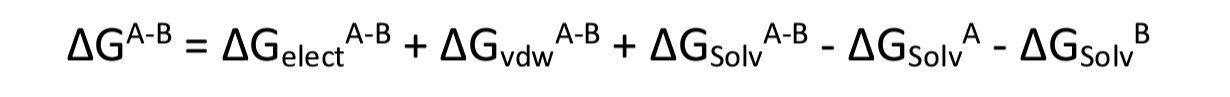

## Step 2 - calculating energies

### Van-der-Waals interaction

In [ ]:
import math

def vdw_int(at1, at2, r):
  eps12 = math.sqrt(at1.xtra["vdw"].eps * at2.xtra["vdw"].eps)
  sig12_2 = at1.xtra["vdw"].sig * at2.xtra["vdw"].sig
  return 4 * eps12 * (sig12_2*6/r**12 - sig12_2**3/r**6)

### Electrostatic energy

We can use the following formulas to calculate the electrostatic energy on a distance r:

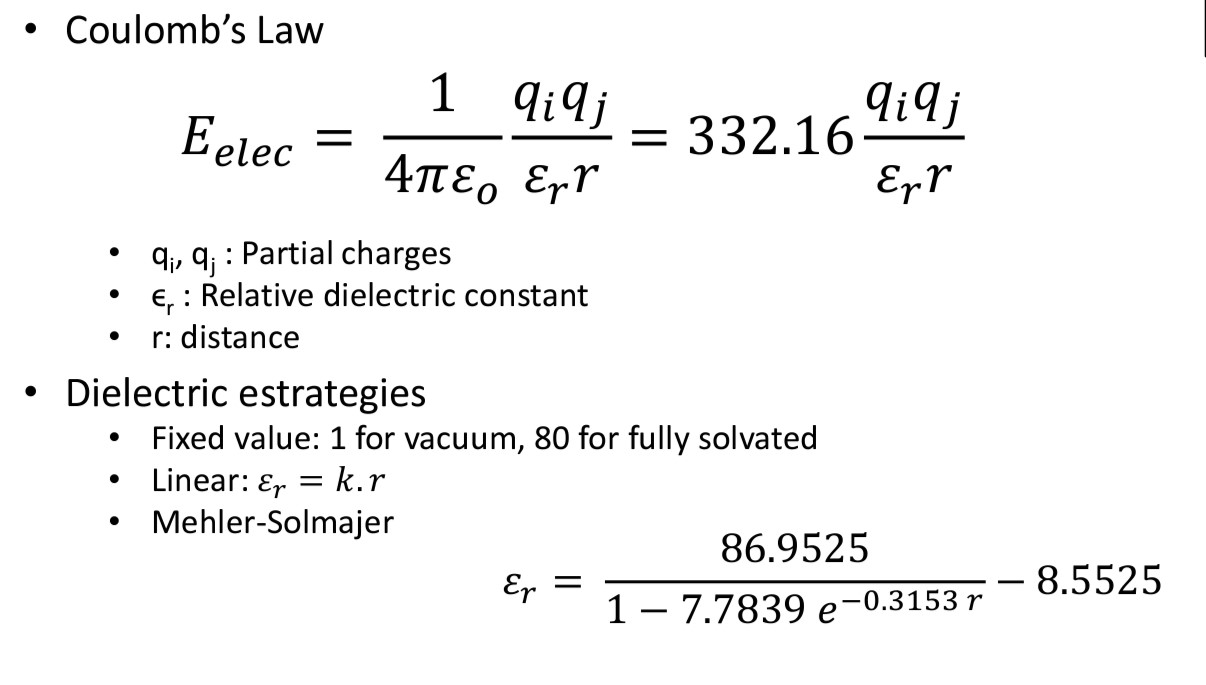

In [ ]:
def MH_diel(rad) -> float: # calculating the dielectic constant
    eps = 86.9525/(1-7.7839*math.e**(-0.3153*rad)) - 8.5525
    return eps

# calculating the electrostatic energy between two atoms at the distance r
def elec_int(at1, at2, r):
    return 332.16 * at1.xtra['charge'] * at2.xtra['charge'] / MH_diel(r) / r

### Solvation energy

In [ ]:
def calc_solvation(res):
    solvation = 0
    solvation_alanine = 0
    for at in res.get_atoms():
        if 'EXP_NACCESS' not in at.xtra:
            continue
        s = float(at.xtra['EXP_NACCESS']) * at.xtra['vdw'].fsrf
        solvation += s
    return solvation

In [ ]:
all_atoms_A[0:10]

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom OG>,
 <Atom H1>,
 <Atom H2>,
 <Atom H3>,
 <Atom HA>]

### Total energy

In [ ]:
def total_energy_residue(res_chain1, res_chain2):
    total_eng = 0
    for res in res_chain1+res_chain2:
        total_eng += calc_solvation(res)
    for res1 in res_chain1:
        for res2 in res_chain2:
            for at1 in res1.get_atoms():
                for at2 in res2.get_atoms():
                    dist = at1 - at2
                    total_eng += elec_int(at1, at2, dist)
                    total_eng += vdw_int(at1, at2, dist)   
    return total_eng     

Calculate total chain and structure energies

In [ ]:
residues_A = list(structure[0]['A'].get_residues())
residues_E = list(structure[0]['E'].get_residues())
total_energy_residue(residues_A, residues_E)

KeyboardInterrupt: ignored

Total energy of entire chains: -166.62

In [ ]:
total_energy_residue(list(interaction_set_A), list(interaction_set_E))

-151.58319262420792

Total energy of interfaces: -151.58

In [ ]:
list(interaction_set_E)[:10]

[<Residue VAL het=  resseq=503 icode= >,
 <Residue ASN het=  resseq=501 icode= >,
 <Residue TYR het=  resseq=495 icode= >,
 <Residue GLN het=  resseq=493 icode= >,
 <Residue LEU het=  resseq=455 icode= >,
 <Residue TYR het=  resseq=453 icode= >,
 <Residue ARG het=  resseq=403 icode= >,
 <Residue TYR het=  resseq=489 icode= >,
 <Residue GLY het=  resseq=476 icode= >,
 <Residue SER het=  resseq=477 icode= >]

Now we can perform Ala-scanning to find the most important residues in the interaction:

In [ ]:
ala_atoms = {'N', 'H', 'CA', 'HA', 'C', 'O', 'CB', 'HB', 'HB1', 'HB2', 'HB3', 'HA1', 'HA2', 'HA3'}

In [ ]:
def ala_energy_residue(res_chain1, res_chain2):
    ala_energies = dict()
    for res in res_chain1:
      total_eng = 0
      total_eng += calc_solvation(res) # waving my hand at solvation
      for at in res:
        if at not in ala_atoms: # only check significant (non-Ala) atoms
          for res2 in res_chain2: # against the other interface only
            for at2 in res2:
              r = at - at2
              total_eng += elec_int(at, at2, r)
              total_eng += vdw_int(at, at2, r)
      ala_energies[(res, res.get_parent())] = round(abs(total_eng), 4)
    for res in res_chain2: # same operation for the other interface
      total_eng = 0
      total_eng += calc_solvation(res)
      for at in res:
        if at not in ala_atoms:
          for res1 in res_chain1:
            for at2 in res1:
              r = at - at2
              total_eng += elec_int(at, at2, r)
              total_eng += vdw_int(at, at2, r)
      ala_energies[(res, res.get_parent())] = round(abs(total_eng), 4)
    return ala_energies     

In [ ]:
ala_energies = ala_energy_residue(list(interaction_set_A), list(interaction_set_E))

In [ ]:
ala_energies

{(<Residue ASP het=  resseq=355 icode= >, <Chain id=A>): 5.8212,
 (<Residue LYS het=  resseq=353 icode= >, <Chain id=A>): 21.6895,
 (<Residue ARG het=  resseq=357 icode= >, <Chain id=A>): 2.6662,
 (<Residue GLY het=  resseq=326 icode= >, <Chain id=A>): 0.5381,
 (<Residue THR het=  resseq=324 icode= >, <Chain id=A>): 0.5398,
 (<Residue THR het=  resseq=78 icode= >, <Chain id=A>): 0.1291,
 (<Residue GLN het=  resseq=76 icode= >, <Chain id=A>): 0.2423,
 (<Residue ALA het=  resseq=80 icode= >, <Chain id=A>): 0.1906,
 (<Residue GLN het=  resseq=325 icode= >, <Chain id=A>): 0.574,
 (<Residue GLU het=  resseq=329 icode= >, <Chain id=A>): 0.498,
 (<Residue MET het=  resseq=82 icode= >, <Chain id=A>): 5.0191,
 (<Residue LEU het=  resseq=79 icode= >, <Chain id=A>): 3.5324,
 (<Residue PHE het=  resseq=32 icode= >, <Chain id=A>): 0.4556,
 (<Residue ASP het=  resseq=38 icode= >, <Chain id=A>): 5.9824,
 (<Residue TYR het=  resseq=83 icode= >, <Chain id=A>): 8.4827,
 (<Residue GLN het=  resseq=81 ico

In [ ]:
sign_energies = {i:v for i,v in ala_energies.items() if v > 1}

In [ ]:
sorted(sign_energies.items(), key = lambda x: x[1])

[((<Residue SER het=  resseq=19 icode= >, <Chain id=A>), 1.1655),
 ((<Residue GLU het=  resseq=35 icode= >, <Chain id=A>), 1.4012),
 ((<Residue ARG het=  resseq=403 icode= >, <Chain id=E>), 1.5712),
 ((<Residue TYR het=  resseq=473 icode= >, <Chain id=E>), 1.6531),
 ((<Residue GLY het=  resseq=476 icode= >, <Chain id=E>), 1.7546),
 ((<Residue GLY het=  resseq=446 icode= >, <Chain id=E>), 1.8192),
 ((<Residue LEU het=  resseq=45 icode= >, <Chain id=A>), 2.0759),
 ((<Residue LYS het=  resseq=417 icode= >, <Chain id=E>), 2.6448),
 ((<Residue ARG het=  resseq=357 icode= >, <Chain id=A>), 2.6662),
 ((<Residue GLU het=  resseq=37 icode= >, <Chain id=A>), 2.8824),
 ((<Residue GLY het=  resseq=496 icode= >, <Chain id=E>), 2.9874),
 ((<Residue ASN het=  resseq=330 icode= >, <Chain id=A>), 3.2671),
 ((<Residue LEU het=  resseq=79 icode= >, <Chain id=A>), 3.5324),
 ((<Residue ALA het=  resseq=475 icode= >, <Chain id=E>), 4.5867),
 ((<Residue TYR het=  resseq=453 icode= >, <Chain id=E>), 4.7823),
